<a href="https://colab.research.google.com/github/vithlanisunil/Tomato-Leaf-Disease-Prediction/blob/master/Transfer_Learning_Inception_V3_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases Dataset(Augmented)/valid'

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [6]:
for layer in inception.layers:
    layer.trainable = False

In [7]:
folders = glob('/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases Dataset(Augmented)/train/*')

In [8]:
folders

['/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases

In [9]:
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Python Programs/Dataset/archive.zip (Unzipped Files)/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
574/574 [==============================] - 451s 787ms/step - loss: 2.3328 - accuracy: 0.7827 - val_loss: 1.6231 - val_accuracy: 0.8281
Epoch 2/10
574/574 [==============================] - 245s 426ms/step - loss: 2.1233 - accuracy: 0.8232 - val_loss: 2.4214 - val_accuracy: 0.8048
Epoch 3/10
574/574 [==============================] - 244s 425ms/step - loss: 1.9919 - accuracy: 0.8428 - val_loss: 2.5762 - val_accuracy: 0.8159
Epoch 4/10
574/574 [==============================] - 243s 424ms/step - loss: 1.8662 - accuracy: 0.8600 - val_loss: 2.3639 - val_accuracy: 0.8349
Epoch 5/10
574/574 [==============================] - 243s 424ms/step - loss: 1.8956 - accuracy: 0.8632 - val_loss: 1.8288 - val_accuracy: 0.8611
Epoch 6/10
574/574 [==============================] - 242s 422ms/step - loss: 1.7287 - accuracy: 0.8759 - val_loss: 3.4542 - val_accuracy: 0.8007
Epoch 7/10
574/574 [==============================] - 245s 427ms/step - loss: 1.9021 - accuracy: 0.8716 - val_loss: 2.3665 -

In [18]:
import matplotlib.pyplot as plt

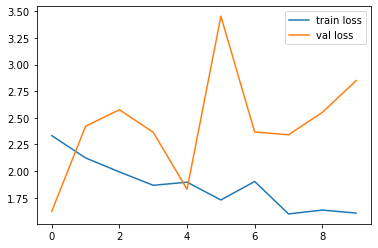

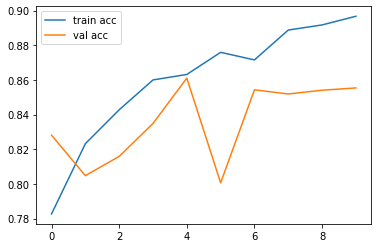

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [21]:
y_pred = model.predict(test_set)

144/144 [==============================] - 17s 112ms/step


In [22]:
y_pred

array([[6.4357889e-34, 1.5713348e-24, 0.0000000e+00, ..., 9.9999142e-01,
        1.1549981e-31, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.7663327e-28, 4.2868858e-19, 1.0000000e+00, ..., 0.0000000e+00,
        3.4481846e-27, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.5082610e-30, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.3114505e-24, ..., 0.0000000e+00,
        0.0000000e+00, 2.1409771e-22],
       [3.9314225e-34, 3.3296058e-23, 1.7870018e-31, ..., 1.0000000e+00,
        9.3313727e-32, 0.0000000e+00]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:

y_pred

array([7, 7, 2, ..., 7, 6, 7])